### Building a neural network with TensorFlow
#### In this module we are going to build a neural network for regression. Regression is the prediction of a real-valued number given some inputs. 

In [27]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Let's generate some data, in this case, a noisy sine wave as plotted below

In [46]:
n_observations = 1000
xs = np.linspace(-3.0, 3.0, n_observations)
ys = np.sin(xs) + np.random.uniform(-0.5, 0.5, n_observations)

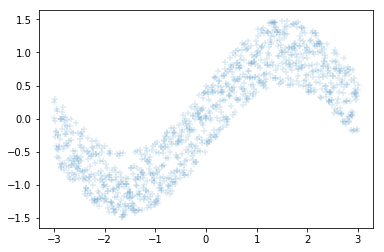

In [47]:
plt.scatter(xs, ys, alpha=0.15, marker = '+')
plt.show()
# alpha makes the points transparent and marker changes it from dots to +'s

#### We are going to use placeholders from now on. Placeholder for X and Y are as follows

In [30]:
X = tf.placeholder(tf.float32, name = 'X')
Y = tf.placeholder(tf.float32, name = 'Y')

sess = tf.InteractiveSession()

In [31]:
n = tf.random_normal([1000]).eval()
n_ = tf.random_normal([1000], stddev = 0.1).eval()

(array([   3.,   15.,   54.,  138.,  215.,  247.,  177.,  102.,   41.,    8.]),
 array([-0.33938691, -0.27555938, -0.21173185, -0.14790431, -0.08407678,
        -0.02024925,  0.04357828,  0.10740582,  0.17123335,  0.23506088,
         0.29888842]),
 <a list of 10 Patch objects>)

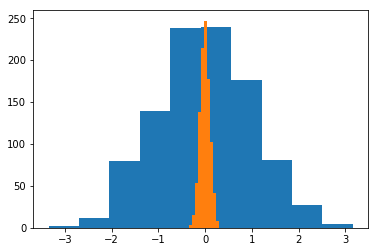

In [32]:
plt.hist(n) # plt.hist(n, 20) gives answer with 20 buckets
plt.hist(n_) # We need initial values much closer to 0 for initializing the weights

#### We need two parameters, weight W and bias B for our model

In [41]:
W = tf.Variable(tf.random_normal([1], stddev=0.1), name = 'weight')
B = tf.Variable(0.0, name = 'bias')

#### We need to define model, and a cost function

In [49]:
# Perceptron model (or Linear regression)
Y_ = X*W + B  

In [50]:
def distance(y, y_):
    return tf.abs(y-y_)

In [51]:
# cost = distance(Y_, tf.sin(X))
cost = tf.reduce_mean(distance(Y_, Y))

In [52]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.01).minimize(cost)

### Now we have defined the variables, we need to run the code
#### Before we run the code, we must also run the variables using tf.initialize_all_variables() to give an initial value to W and B.

In [69]:
n_iterations = 100
sess.run(tf.initialize_all_variables())
for _ in range(n_iterations):
    sess.run(optimizer, feed_dict = {X:xs, Y:ys})
    training_cost = sess.run(cost, feed_dict = {X:xs, Y:ys})
    
    # This is how to print the values mid execution
    print training_cost, sess.run(W), sess.run(B)

0.424051 [ 0.37850231] 0.00121984
0.424051 [ 0.37850681] 0.00119984
0.424051 [ 0.37851125] 0.00119984
0.424051 [ 0.37851569] 0.00119984
0.424051 [ 0.37850001] 0.00121984
0.424051 [ 0.37850451] 0.00119984
0.424051 [ 0.37850896] 0.00119984
0.424051 [ 0.3785134] 0.00119984
0.424051 [ 0.37851784] 0.00119984
0.424051 [ 0.37850216] 0.00121984
0.424051 [ 0.37850666] 0.00119984
0.424051 [ 0.3785111] 0.00119984
0.424051 [ 0.37851554] 0.00119984
0.424051 [ 0.37851998] 0.00119984
0.424051 [ 0.37850431] 0.00121984
0.424051 [ 0.37850881] 0.00119984
0.424051 [ 0.37851325] 0.00119984
0.424051 [ 0.37851769] 0.00119984
0.424051 [ 0.37850201] 0.00121984
0.424051 [ 0.37850651] 0.00119984
0.424051 [ 0.37851095] 0.00119984
0.424051 [ 0.37851539] 0.00119984
0.424051 [ 0.37851983] 0.00119984
0.424051 [ 0.37850416] 0.00121984
0.424051 [ 0.37850866] 0.00119984
0.424051 [ 0.3785131] 0.00119984
0.424051 [ 0.37851754] 0.00119984
0.424051 [ 0.37850186] 0.00121984
0.424051 [ 0.37850636] 0.00119984
0.424051 [ 0.3785